
# bioinformatics, Final Project

## Sina Mansour, 96210207
---



### Ebola Virus Genome (part 1.2 & 1.3):

Ebola virus is a member of the Filovirus family, a family of viruses causing haemorrhagic fever. Each virion of an Ebola Virus, carries one molecule of linear, single-stranded, negative-sense (3' to 5') RNA containing its whole genome (around 18,959 to 18,961 nucleotides in length). This genome codes seven structural proteins and one non-structural protein (two non-structural protein according to some references). The picture bellow shows where the genes for each protein are located in the RNA sequence:

![ebolaRNA](Filovirus_genome.png "Ebola protein locations on RNA")

also, here's another representation from the NCBI Nucleutide core online database:

![ebolaG](p3.png "Ebola gene locations on Genome")

Now let's dig a little deeper on what the virus is made of and what each protein does. looking at the ebola virion structure as seen in the figure bellow the virus has a membrane and the glycoproteins (GP) are standing outside the membrane. It also has nucleoprotein (N) inside the membrane. The genetic material (RNA) is within the nucleoprotein. there are also other proteins existing inside the membrane, such as the RNA polymerase (L) used in dna replication, and also the viral proteins (vpX). the viral proteins are devided into to sections, VP40 & VP35 are polymerase cofactors, and VP30 & VP24 are transcription activators. There are also non-structural proteins sGP (and ssGP) which are small non-structural, secreted glycoproteins.

![ebola](p4.png "Ebola virion shape")

The picture bellow explains some details about each protein:

![ebolaProt](p5.jpg "Ebola virion proteins")

What Ebola virus does in general is replicating itself inside our body cells (budding). VP40 & VP24 are mainly responsible for this procedure. now let's explain the whole procedure. First, the GP protein makes cells to recognize the virus as normal, letting it pass through the cell. So GP helps the virus to enter the cell. Once the virus is inside the cell, it releases all it's contents, including the genetic material and other proteins to the cell's cytoplasm. Then the genetic material will be replicated with help of the RNA polymerase (L). It will also go through transcription and translation, resulting in production of all other proteins from the Ebola genome. So the virus uses cell nutritients for replication and then releases multiple copies of itself once finished. this cycle is visualy explained in the picture bellow.

![ebolaCycle](p6.png "Ebolavirus cycle")

It is important to note how ebola virus survives from the immune cells in human body. as with any other type of virus, ebola is also eaten by the immune cells in human body. but even after that, ebolavirus can replicate itself inside the immune cell. As a result, the immune cell itself will be infected.

So to sum it all up: The GP protein help invasion of the host cell. L protein is the RNA polymerase making copies of the viral RNA. the transcription activator VP30 helps he L protein in the replication procedure. The NP protein binds to the viral RNA wrapping it inside the cell in a helix shape. Proteins VP35 and VP24 have two main roles, first stabilizing the helix structure of the viral RNA incide cell, and second helping to supress the host cell's immune response to the viral invasion. The matrix protein VP40 plays 3 different role in different configurations: 1. used in viral replication (as a cyclic octamer) 2. transports the elements of the nucleocapsule to the host cell (as a dimer) 3. helps budding the new copies of the virus (as a haxomer in the host cell)

![ebolaProts](p7.jpg "Ebolavirus Proteins")


---
References:

[PDB, Ebola Virus Proteins](http://pdb101.rcsb.org/motm/178)

[Science Daily, How Ebola disables people's immune defenses](https://www.sciencedaily.com/releases/2017/05/170524101419.htm)

[Science, What does Ebola actually do?](http://www.sciencemag.org/news/2014/08/what-does-ebola-actually-do)

[World Health Organization, Ebola virus disease](http://www.who.int/mediacentre/factsheets/fs103/en/)

[Viralzone, Ebolavirus](http://viralzone.expasy.org/207?outline=all_by_species)

[BioSynthesis, The Ebola Virus Genome and Proteome](http://www.biosyn.com/tew/the-ebola-virus-genome-and-proteome.aspx)

[NCBI nucleutide search](https://www.ncbi.nlm.nih.gov/nuccore/10313991?report=graph)

[Wikipedia](https://en.wikipedia.org/wiki/Ebola_virus)

---


In [165]:
# import required libraries:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import power_divergence
from scipy.stats import binom_test
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from Bio import SeqIO
from io import StringIO
from Bio import Phylo
from Bio import pairwise2
from Bio.Phylo.Consensus import majority_consensus
from Bio.pairwise2 import format_alignment
from skbio import DistanceMatrix
from skbio.tree import nj
from ete3 import Tree, TreeStyle, TextFace
import edlib
from IPython.display import Image
%matplotlib inline
sns.set_style("whitegrid")
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation


### Sequence (part 2):

let's get our hand dirty with some code now!

---

#### Data Import (part 2.1):

first we would load all the information from different ebolavirus input files (files from a subdirectory):


In [2]:
# link to each file name:
Marburg_Genes_file = 'BioProjectFiles/Marburg_Genes.fasta'

Marburg_genome_file = 'BioProjectFiles/Marburg_genome.fasta'
Bundibugyo_genome_file = 'BioProjectFiles/Bundibugyo_genome.fasta'
Reston_genome_file = 'BioProjectFiles/Reston_genome.fasta'
Sudan_genome_file = 'BioProjectFiles/Sudan_genome.fasta'
TaiForest_genome_file = 'BioProjectFiles/TaiForest_genome.fasta'
Zaire_genome_file = 'BioProjectFiles/Zaire_genome.fasta'

# basic class for Organisms:
class Organism():
    """docstring for Organism: initialize this with a fasta genome file"""

    def __init__(self, genome_file):
        self.genome_file = genome_file
        seq = [x for x in SeqIO.parse(genome_file, 'fasta')][0]
        self.name = seq.id
        self.genome = str(seq.seq)
        self.genes = {}
        self.gene_loci = {}

# initialize each organism with genome
Marburg = Organism(Marburg_genome_file)
Bundibugyo = Organism(Bundibugyo_genome_file)
Reston = Organism(Reston_genome_file)
Sudan = Organism(Sudan_genome_file)
TaiForest = Organism(TaiForest_genome_file)
Zaire = Organism(Zaire_genome_file)



---

#### Gene extraction (part 2.2):

First, let's collect the information about each Marburg Gene, then we could use that to ectract Gene information of Ebolavirus.


In [3]:
# extract information from marburg genes file
genes = SeqIO.parse(Marburg_Genes_file, 'fasta')

# add the gene information to marburg organism file:
for gene in genes:
    Marburg.genes[gene.id] = str(gene.seq)
    Marburg.gene_loci[gene.id] = Marburg.genome.find(str(gene.seq))


In [5]:
Marburg.gene_loci


{'GP': 5824,
 'L': 11290,
 'NP': 48,
 'VP24': 9998,
 'VP30': 8767,
 'VP35': 2853,
 'VP40': 4414}

Now that we have the gene loci. it is important to note that even the starting part of the gene was enough to find the loci. the snippet bellow shows how only $50$ characters can find the unique starting point.

In [9]:
[(Marburg.genome.find(Marburg.genes[x][:50])) for x in Marburg.genes]


[4414, 9998, 11290, 8767, 5824, 48, 2853]

Now let's use this information to align and locate the same genes in other organisms. we will use a C++ code to do the global-local alignment. The C++ code will do the alignment. we'll add a python wrapper around it to do what we need:

* Note: This C++ code for the alignment algorithm is stored in the same directory at "align.cpp". the code simple gives a + 1 score for match, -1 for mismatch, -1 for internal gaps, 0 for gaps around the local aligned sequence.


In [ ]:
# %load align.cpp
#include <iostream>
#include <string>

using namespace std;

string calc_align(string sseq, string lseq) {
	// keep score of alignment
	int** score = new int*[lseq.size() + 1];
	for(int i = 0; i <= lseq.size(); ++i)
	    score[i] = new int[sseq.size() + 1];
	// keep starting point of alignment in longer sequence
	int** start = new int*[lseq.size() + 1];
	for(int i = 0; i <= lseq.size(); ++i)
	    start[i] = new int[sseq.size() + 1];
	// keep ending point of alignment in longer sequence
	int** end = new int*[lseq.size() + 1];
	for(int i = 0; i <= lseq.size(); ++i)
	    end[i] = new int[sseq.size() + 1];

	// i1=long, i2=short index
	for (int i1 = 0; i1 <= lseq.size(); ++i1) {
		for (int i2 = 0; i2 <= sseq.size(); ++i2) {
			// if short sequence is not started no scores are given (do not deduct if starting gaps)
			if (i2 == 0) {
				score[i1][i2] = 0;
				start[i1][i2] = i1;
				end[i1][i2] = i1;
			}
			// if short sequence is being lost, mismatch score
			if (i2 > 0 && i1 == 0) {
				score[i1][i2] = score[i1][i2 - 1] - 1;
				start[i1][i2] = 0;
				end[i1][i2] = i1;
			}

			if (i2 > 0 && i1 > 0) {
				int max_score = -3000000;

				// if matched:
				int match_score = score[i1 - 1][i2 - 1];
				if (lseq[i1-1] == sseq[i2-1]) match_score += 1;
				else match_score -= 1;
				if (max_score < match_score) max_score = match_score;

				// if short skipped
				int skip_short_score = score[i1][i2 - 1] - 1;
				if (max_score < skip_short_score) max_score = skip_short_score;

				// if long skipped (do not deduct if ending gaps)
				int skip_long_score = score[i1 - 1][i2] - 1;
				if (i2 == sseq.size()) skip_long_score += 1;
				if (max_score < skip_long_score) max_score = skip_long_score;

				// now fill the tables
				score[i1][i2] = max_score;
				if (max_score == match_score) {
					start[i1][i2] = start[i1 - 1][i2 - 1];
					end[i1][i2] = i1;
				} else if (max_score == skip_short_score) {
					start[i1][i2] = start[i1][i2 - 1];
					end[i1][i2] = end[i1][i2 - 1];
				} else if (max_score == skip_long_score) {
					start[i1][i2] = start[i1 - 1][i2];
					if (i2 == sseq.size()) end[i1][i2] = end[i1 - 1][i2];
					else end[i1][i2] = i1;
				}
			}
			//cout << "i1: " <<  i1  << ", i2: " << i2 << "\n";
			//cout << score[i1][i2] << "\t";
		}
		//cout << "\n";
	}
	//cout << "score: " <<  score[lseq.size()][sseq.size()] << "\n";
	// report the aligned substring of the long sequence
	int aln_start = start[lseq.size()][sseq.size()];
	int aln_end = end[lseq.size()][sseq.size()];
	int aln_len = aln_end - aln_start;
	return lseq.substr(aln_start, aln_len);
}

int main() {
	string sseq, lseq;
	cin >> lseq;
	cin >> sseq;
	cout << calc_align(sseq, lseq) << "\n";
	return 0;
}


In [19]:
# local global alignment (to find a short sequence in middle of a longer sequence)
def lg_align(long_seq, short_seq):
    temp_file = 'tmp.in'
    with open(temp_file, 'w') as tmp:
        tmp.write('{}\n{}\n'.format(long_seq, short_seq))
    ans = !cat tmp.in | ./MyAlign
    # this will return a substring of the longer sequence
    return ans[0]


Now that we have a function for alignment, lets find the loci for genes of all ebolavirus organisms. All we need to do is to lacate the genes in genome by alignment of Marburg genes to a predicted window (containing at most $l$ extra sequence characters before and after where the same gene was located in the Marburg Genome, where $l$ is the length of the gene sequence under investigation)


In [28]:
# list all genes and sort by occurance in Marburg genome
genes = [x for x in Marburg.genes]
genes.sort(key= lambda x: Marburg.gene_loci[x])

# list all Ebolavirus organisms
ebola_org = [Bundibugyo, Reston, Sudan, TaiForest, Zaire]

# match all genes in all organisms using Marburg data:
for organism in ebola_org:
    start_pointer = 0
    end_pointer = 0
    for gene in genes:
        # choose a window from genome to search for the particular gene, we use
        # extra window size
        l = len(Marburg.genes[gene])
        window_start = max(0, min((start_pointer - l), (Marburg.gene_loci[gene] - l)))
        window_end = min(len(organism.genome), max((end_pointer + 2*l), (Marburg.gene_loci[gene] + 2*l)))
        aligned_gene_seq = lg_align(organism.genome[window_start:window_end], Marburg.genes[gene])
        organism.genes[gene] = aligned_gene_seq
        organism.gene_loci[gene] = organism.genome.find(aligned_gene_seq)


In [30]:
z = [Bundibugyo, Reston, Sudan, TaiForest, Zaire, Marburg]
[x.gene_loci for x in z]


[{'GP': 5919,
  'L': 11381,
  'NP': 418,
  'VP24': 10134,
  'VP30': 8370,
  'VP35': 3007,
  'VP40': 3159},
 {'GP': 5975,
  'L': 11327,
  'NP': 417,
  'VP24': 10051,
  'VP30': 8373,
  'VP35': 3007,
  'VP40': 4350},
 {'GP': 5869,
  'L': 11337,
  'NP': 444,
  'VP24': 10087,
  'VP30': 8326,
  'VP35': 3012,
  'VP40': 4299},
 {'GP': 5934,
  'L': 11371,
  'NP': 481,
  'VP24': 10153,
  'VP30': 8323,
  'VP35': 3025,
  'VP40': 4303},
 {'GP': 5940,
  'L': 11385,
  'NP': 449,
  'VP24': 10093,
  'VP30': 8376,
  'VP35': 3031,
  'VP40': 4389},
 {'GP': 5824,
  'L': 11290,
  'NP': 48,
  'VP24': 9998,
  'VP30': 8767,
  'VP35': 2853,
  'VP40': 4414}]

The results show how the gene loci are similar amongst different organisms.

---

#### Gene alignment & distance matrix (part 2.3):

Now we like to align all genes for organisms in the ebolavirus genus. Then, we could use these distance matrices to create the phylotree of organisms. in this section we use Biopython's pairwise2 function that implements the needleman-wunsch algorithm for us. (it is just a basic dynamical programming to calculate the distance matrix for every couple of genes)


In [41]:
# for every gene store a 5*5 distance matrix
d_matrices = {}

# iterate the proccess for all genes
for gene in genes:
    # output csv file
    csv_file = "{}.csv".format(gene)

    # stored distance matrix
    dist_mat = np.zeros((5,5))

    for i1, org1 in enumerate(ebola_org):
        for i2, org2 in enumerate(ebola_org):
            # do not do extra calculations if not needed
            if (i1 == i2 or dist_mat[i1][i2] > 0):
                continue
            
            dist = pairwise2.align.globalms(org1.genes[gene], org2.genes[gene], 0, -1, -1, -1)
            dist_mat[i1][i2] = -dist[0][2]
            dist_mat[i2][i1] = -dist[0][2]

    # now store the final matrix
    dist_df = pd.DataFrame(dist_mat, columns=[x.name for x in ebola_org], index=[x.name for x in ebola_org])
    d_matrices[gene] = dist_df
    dist_df.to_csv(csv_file)


### Phylogenetic tree (part 3):

A phylogenetic tree or evolutionary tree is a dendogram that is used to explain how various organisms mutated from the very same ancestor. it can show evolutionary relationships among organisms. In this section we will use two common techniques to create the phylotree for the 5 ebolavirus organisms.

---

#### Phylogenetic tree for individual genes (part 3.1):

First we would make a single tree for each gene. in the next section we try to somehow combine the gene scores/trees to come up with a final decision. The algorithms choosed are methods that create the Phylogenetic tree from a distance matrix. The algorithms used are briefly explained bellow:

* **UPGMA**: (Unweighted Pair Group Method with Arithmetic Mean) is a simple agglomerative (bottom-up) hierarchical clustering method. Simply, in each step the algorithm finds the two closest pairs and clusters them (as if they had the same ancestor). The distance between each two clusters is then calculated by averaging  the individual distances. check [this link](https://en.wikipedia.org/wiki/UPGMA) for more thorough explanation.

* **Neighbor joining**: it is yet another bottom-up (agglomerative) clustering method for the creation of phylogenetic trees. It is a method that can be used on additive distance matrices to find the *correct* answer. That is, if the distance matrix is truly a shoetest path distance metric on a tree, the algorithm will find the correct tree structure. The algorithm starts with a graph with all nodes as separate components. In every step, the algorithm basically chooses two nodes that can be neighbors and joins them with their common ancestor. then the distance matrix is updated in a way that the joint nodes are merged together. You can find a complete description for the algorithm [here](https://en.wikipedia.org/wiki/Neighbor_joining).

---

Enough talks! let's get back to the codes:

**UPGMA**: we use *scipy.cluster.hierarchy.linkage* which has a built-in implementation of UPGMA.



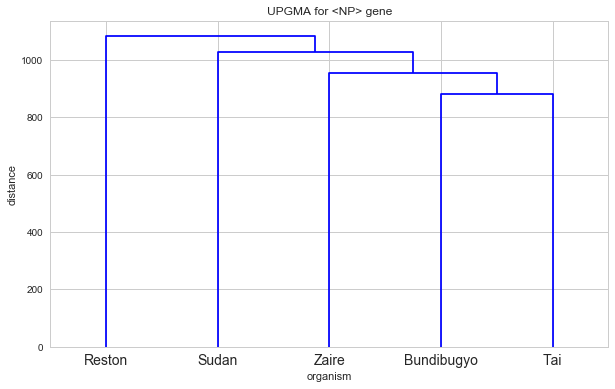

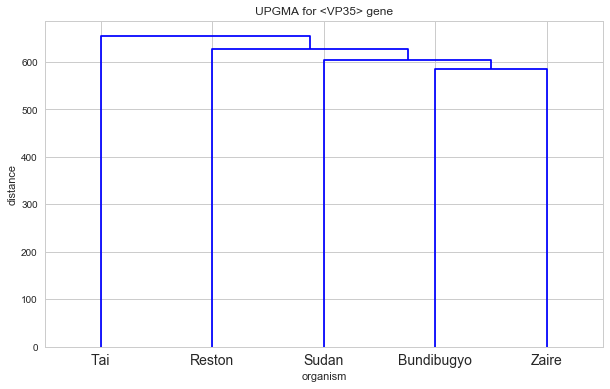

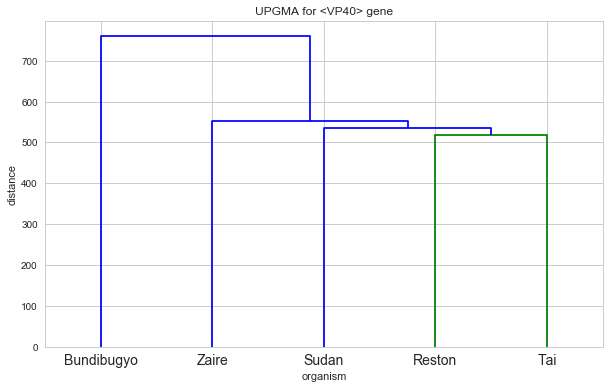

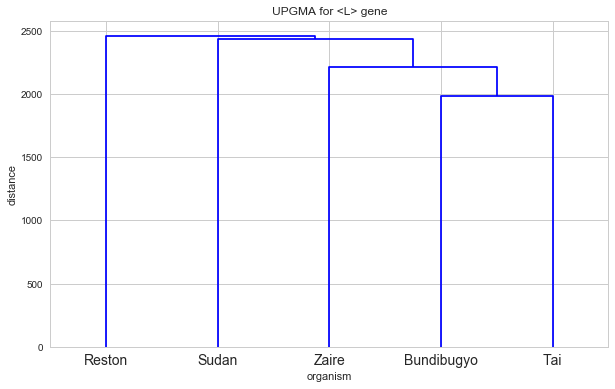

In [70]:
# store UPGMA results
upgma_d = {}
for gene in genes:
    # create a condenced distance matrix for scipy linkage tool (the UPGMA is implemented in linkage code)
    condensed_dist = []
    for i in range(len(ebola_org) - 1):
        condensed_dist += list(np.array(d_matrices[gene])[i][i+1:])
    link = linkage(condensed_dist, method='average')
    upgma_d[gene] = link
    
    # now plot and store the dendogram
    plt.figure(figsize=(10, 6))
    plt.title('UPGMA for <{}> gene'.format(gene))
    plt.xlabel('organism')
    plt.ylabel('distance')
    d = dendrogram(
        link,
        leaf_rotation=0.,  # rotates the x axis labels
        leaf_font_size=14.,  # font size for the x axis labels
        labels=[x.name for x in ebola_org]
    )
    plt.savefig('{}-UPGMA.png'.format(gene))


---

**neighbor joining**: we use the *scikit-bio* package which has a built in method for NJ algotithm, then we use *ETE* package for visualization of the output newick tree format:


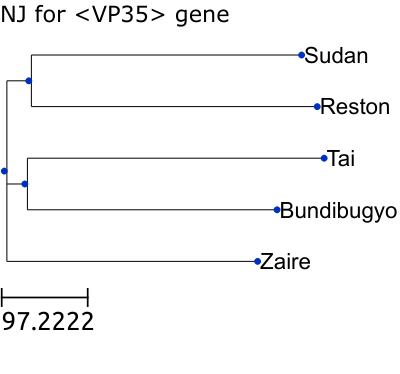

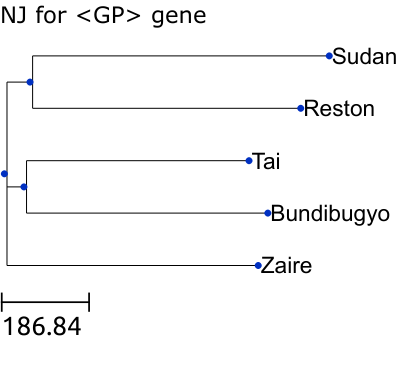

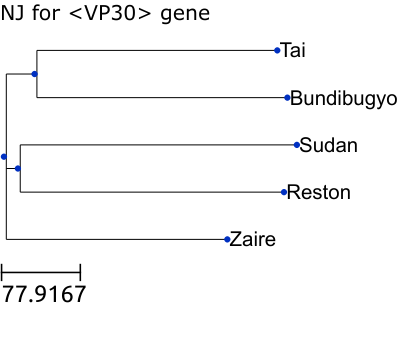

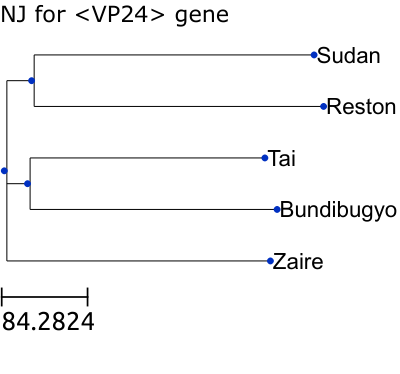

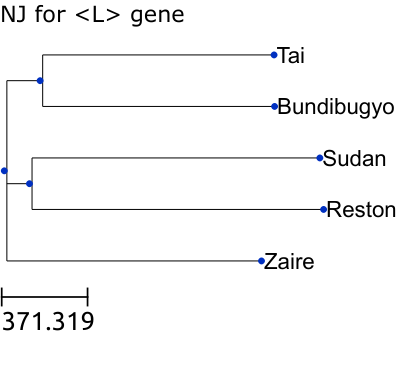

In [146]:
# store NJ results
nj_nw = {}
for gene in genes:
    dist = np.array(d_matrices[gene])
    ids = [x.name for x in ebola_org]
    dm = DistanceMatrix(dist, ids)
    # newick format
    nwtree = nj(dm, result_constructor=str)
    nj_nw[gene] = nwtree
    #import newick format to visualize
    t = Tree(nwtree)
    # now plot and store the dendogram
    ts = TreeStyle()
    ts.show_leaf_name = True
    ts.branch_vertical_margin = 15 # 10 pixels between adjacent branches
    ts.title.add_face(TextFace('NJ for <{}> gene'.format(gene), fsize=10), column=0)
    t.render(file_name='{}-NJ.png'.format(gene), tree_style=ts, w=400)
    display(Image('{}-NJ.png'.format(gene)))



---

**Observations**:

As noted the results are sometimes different but overally similar. Firt thing to note is that our difference metric shows how these organisms are mostly mutated in a similar fashion. For instance, something that is instantly apparent is how Bundibugyo and Tai are nearly always neighbors. this shows that they probably have a lot of similarities in their genome.

Also note that the NJ method does not really provide a meaningful root for the phylo tree as it does not clearly try to create same length leaves. That's why eventhough many of the phylotrees from NJ algorith show Reston and Sudan as neighbors, the length of their distance is an evidence for them bein the first mutations. (as shown in UPGMA results.)

To conclude, in our case the UPGMA has the appropriate information in way which is no misleading. Thus, in the next sections UPGMA method is chosen over NJ. Actually eventhough the NJ method would lead to the correct tree further investigation is nedded in order to locate the root of that tree. but in the UPGMA all the calculations are to achieve a rooted tree structure which is what was intended.

---




#### Phylogenetic tree merge (part 3.2):

now that we have individual phylotrees, we're intrested in ways of merging them in order to come to a conclusion. One rather trivial approach is to average the distance matrices and generate the combined tree from that. Let's first see this naive method's result:



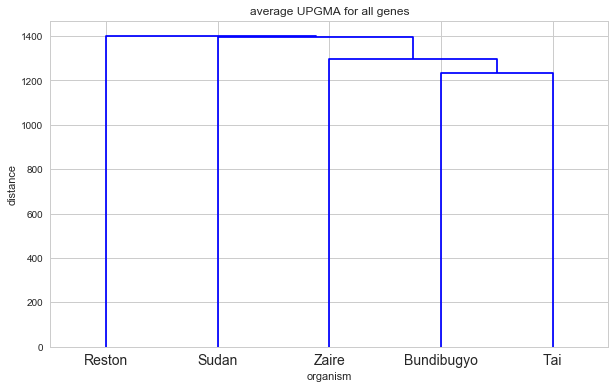

In [172]:
# create average distance matrix
d_avg = sum([d_matrices[x] for x in d_matrices]) / 5

condensed_dist = []
for i in range(len(ebola_org) - 1):
    condensed_dist += list(np.array(d_avg)[i][i+1:])
link = linkage(condensed_dist, method='average')
upgma_d['avg'] = link

# now plot and store the dendogram
plt.figure(figsize=(10, 6))
plt.title('average UPGMA for all genes'.format(gene))
plt.xlabel('organism')
plt.ylabel('distance')
d = dendrogram(
    link,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
    labels=[x.name for x in ebola_org]
)
plt.savefig('avg-UPGMA.png'.format(gene))

dist = np.array(d_avg)
ids = [x.name for x in ebola_org]
dm = DistanceMatrix(dist, ids)
# newick format
nwtree = nj(dm, result_constructor=str)
#import newick format to visualize
t = Tree(nwtree)
# now plot and store the dendogram
ts = TreeStyle()
ts.show_leaf_name = True
ts.branch_vertical_margin = 15 # 10 pixels between adjacent branches
ts.title.add_face(TextFace('average NJ for all genes'.format(gene), fsize=10), column=0)
t.render(file_name='avg-NJ.png'.format(gene), tree_style=ts, w=400)
display(Image('avg-NJ.png'.format(gene)))



Note how even this naive approach can find the right answer (compared to the picture bellow from [this research paper](http://www.scielo.br/scielo.php?script=sci_arttext&pid=S1678-91992014000200209)).

![ebolaPhylo](p8.jpg "Ebola genus phylogenetic tree")

Now to use the more sophisticated tree consensus algorithm, we implement a code to build *newick tree format* from the *scipy linkage* format. then use the available consensus algorithm in the *Bio.Phylo* package. The tree consensus method basically looks for similar neighbor patterns and keeps the majority of such patterns to create the consensus tree (you can find details of this algorithm [here](https://www.geol.umd.edu/~tholtz/G331/lectures/cladistics5.pdf)). also [this](https://stackoverflow.com/questions/28222179/save-dendrogram-to-newick-format) stackoverflow post was where the format change script was used from)

In [134]:
# function to change format to newick
def getNewick(node, newick, parentdist, leaf_names):
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parentdist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parentdist - node.dist, newick)
        else:
            newick = ");"
        newick = getNewick(node.get_left(), newick, node.dist, leaf_names)
        newick = getNewick(node.get_right(), ",%s" % (newick), node.dist, leaf_names)
        newick = "(%s" % (newick)
        return newick
    

In [161]:
# store newick for all UPGMA results
upgma_nw = {}
for x in upgma_d:
    tree = hierarchy.to_tree(upgma_d[x],False)
    upgma_nw[x] = getNewick(tree, "", tree.dist, [x.name for x in ebola_org])

#  a function to read the newick data
def read_newick(treedata):
    handle = StringIO(treedata)
    return Phylo.read(handle, "newick")
    
# now use the consensus method
trees = [read_newick(upgma_nw[x]) for x in genes]
majority_tree = majority_consensus(trees, 0.5)
Phylo.draw(majority_tree)


The same can be done for the NJ method tree:

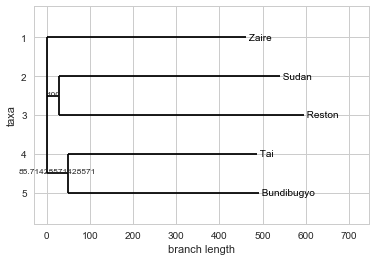

In [162]:
trees = [read_newick(nj_nw[x]) for x in genes]
majority_tree = majority_consensus(trees, 0.5)
Phylo.draw(majority_tree)


Now to conclude the results, I believe the naive approach does the best in our case so that is what I recommend. It has a basic logic but does as well as the other methods in finding the Phylotree.

---


#### global alignment comparison (part 3.3):

now that we have a final global allignment we like to see how it differs from the global genome alignment scenario. In other words, we're intrested to see the differences of whole genome alignment from what we do.

As instructed we use myers ‪bit‬‬ vector‬ ‫‪algorithm from python's edlib package. This algorithm is a fast algorithm for approximate string matching based on dynamic programming. If you're interested in the details of this algorithm you can check [the research article](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.332.9395&rep=rep1&type=pdf). The reason we use this algorithm is to speed up the long genome alignment process.

In order to do a global genome alignment, we will create a distance matrix for all genome pairs and run UPGMA afterwards.



In [166]:
# output csv file
csv_file = "genome.csv"

# stored distance matrix
dist_mat = np.zeros((5,5))

for i1, org1 in enumerate(ebola_org):
    for i2, org2 in enumerate(ebola_org):
        # do not do extra calculations if not needed
        if (i1 == i2 or dist_mat[i1][i2] > 0):
            continue

        dist = edlib.align(org1.genome, org2.genome, task='distance')["editDistance"]
        dist_mat[i1][i2] = dist
        dist_mat[i2][i1] = dist

# now store the final matrix
dist_df = pd.DataFrame(dist_mat, columns=[x.name for x in ebola_org], index=[x.name for x in ebola_org])
dist_genome = dist_df
dist_df.to_csv(csv_file)


Now run UPGMA global genome:

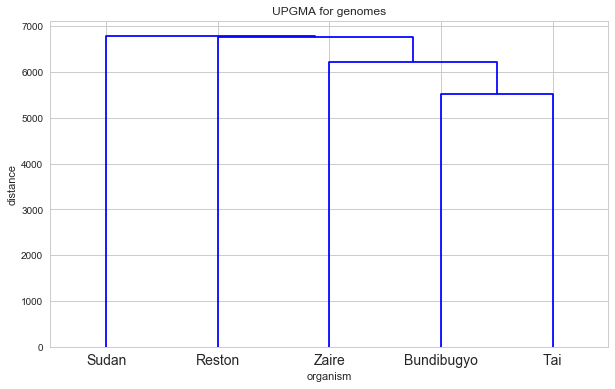

In [178]:
condensed_dist = []
for i in range(len(ebola_org) - 1):
    condensed_dist += list(np.array(dist_genome)[i][i+1:])
link = linkage(condensed_dist, method='average')
upgma_d['avg'] = link

# now plot and store the dendogram
plt.figure(figsize=(10, 6))
plt.title('UPGMA for genomes'.format(gene))
plt.xlabel('organism')
plt.ylabel('distance')
d = dendrogram(
    link,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
    labels=[x.name for x in ebola_org]
)
plt.savefig('genome-UPGMA.png'.format(gene))


Note how our naive algorithm's result is similar to the whole genome alignment method. This is also another evidence that shows how good the naive algorithm actually works.

Let's now check the neighbor joining result just to finalize the set of results.

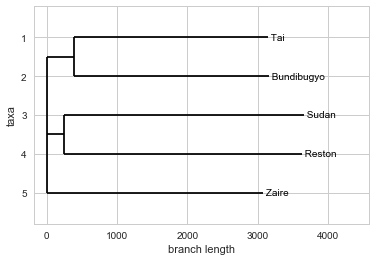

In [174]:
dist = np.array(dist_genome)
ids = [x.name for x in ebola_org]
dm = DistanceMatrix(dist, ids)
# newick format
nwtree = nj(dm, result_constructor=str)
#import newick format to visualize
t = Tree(nwtree)
# now plot and store the dendogram
ts = TreeStyle()
ts.show_leaf_name = True
ts.branch_vertical_margin = 15 # 10 pixels between adjacent branches
ts.title.add_face(TextFace('NJ for genomes'.format(gene), fsize=10), column=0)
t.render(file_name='genome-NJ.png'.format(gene), tree_style=ts, w=400)
# display(Image('genome-NJ.png'.format(gene)))
Phylo.draw(read_newick(nwtree))


---

#### Locate starting point (part 3.4):

We now know a lot more about various ways of Phylotree generation. Now, all we need to do is to add the marburg genome and have another whole genome alignment to see the starting point better. Without adding the Marburg genome the root of the phylotree for ebolavirus genus is somehow vague and unrelieble (since there is no hard evidence to approve it.).


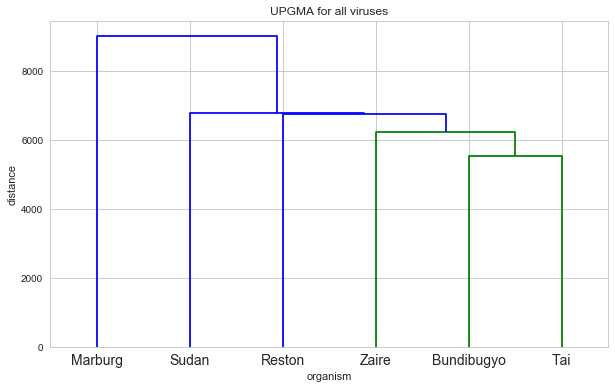

In [176]:
organisms = [Marburg] + ebola_org

# output csv file
csv_file = "all_genome.csv"

# stored distance matrix
dist_mat = np.zeros((6,6))

for i1, org1 in enumerate(organisms):
    for i2, org2 in enumerate(organisms):
        # do not do extra calculations if not needed
        if (i1 == i2 or dist_mat[i1][i2] > 0):
            continue

        dist = edlib.align(org1.genome, org2.genome, task='distance')["editDistance"]
        dist_mat[i1][i2] = dist
        dist_mat[i2][i1] = dist

# now store the final matrix
dist_df = pd.DataFrame(dist_mat, columns=[x.name for x in organisms], index=[x.name for x in organisms])
dist_all = dist_df
dist_df.to_csv(csv_file)

condensed_dist = []
for i in range(len(organisms) - 1):
    condensed_dist += list(np.array(dist_all)[i][i+1:])
link = linkage(condensed_dist, method='average')

# now plot and store the dendogram
plt.figure(figsize=(10, 6))
plt.title('UPGMA for all viruses'.format(gene))
plt.xlabel('organism')
plt.ylabel('distance')
d = dendrogram(
    link,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
    labels=[x.name for x in organisms]
)
plt.savefig('all-UPGMA.png'.format(gene))

This is also very similar to the research results (picture posted in previous sections.). Just to compare let's see the results using NJ method. (this is not a good method since there's is no real notion of root in this algorithm)


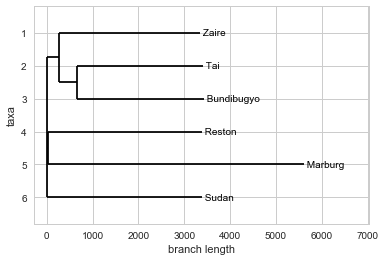

In [177]:
dist = np.array(dist_all)
ids = [x.name for x in organisms]
dm = DistanceMatrix(dist, ids)
# newick format
nwtree = nj(dm, result_constructor=str)
#import newick format to visualize
t = Tree(nwtree)
# now plot and store the dendogram
ts = TreeStyle()
ts.show_leaf_name = True
ts.branch_vertical_margin = 15 # 10 pixels between adjacent branches
ts.title.add_face(TextFace('NJ for all viruses'.format(gene), fsize=10), column=0)
t.render(file_name='all-NJ.png'.format(gene), tree_style=ts, w=400)
# display(Image('all-NJ.png'.format(gene)))
Phylo.draw(read_newick(nwtree))


The resulted picture approves our suggestion that UPGMA is better than NJ in our case.

---

### Estimating past, predicting future (part 4):

In this section we intend to use basic statistics of evolution to derive some estimations and predictions.

---

#### When did they mutate (part 4.1):

In this section we like to estimate the time these organisms diverged (evolved) from their common ancestor. That is, we are trying to estimate the average time when Marburg & Ebola mutated from their common ancestor of the Filovirus.

As the question tells the mutation rate is $1.9 \times 10^{-3}$ for a single site mutation. Since $E[t] = \frac{1}{\lambda}$ where the mutation follows a poisson distribution $P(0|\lambda) = e^{-\lambda}$, then we have: $\lambda = 1.9 \times 10^{-3}$

We intend to use the Jukes and Cantor model for estimation of the time (check [this link](http://treethinkers.org/jukes-cantor-model-of-dna-substitution/) for description). Now since in this model we have $\lambda = 8 \mu t$ and we intend to estimate $\mu$

Also from the data and distance information we have $p_{distance} = \frac{m1}{n} = \frac{9064}{19111} \approx 0.474$. Using $t = -\frac{3}{4} ln\left(1 - \frac{4}{3}p \right)$ we have $t \approx 0.75$. Thus we can conclude that $\mu = \frac{t}{8\lambda} \approx 49.37$. Therefore, we conclude that the common ancestor lived about 50 years ago.


In [185]:
# heres the distance matrix for appraisal (used in the calculations above)
dist_all


Marburg  Bundibugyo  Reston   Sudan     Tai   Zaire
Marburg         0.0      9064.0  8926.0  8989.0  9046.0  8986.0
Bundibugyo   9064.0         0.0  6797.0  6815.0  5530.0  6247.0
Reston       8926.0      6797.0     0.0  6788.0  6783.0  6697.0
Sudan        8989.0      6815.0  6788.0     0.0  6804.0  6740.0
Tai          9046.0      5530.0  6783.0  6804.0     0.0  6209.0
Zaire        8986.0      6247.0  6697.0  6740.0  6209.0     0.0

In [193]:
# now let's calculate distances for all pairs:
def calculate_dist(x):
    p = x / len(Marburg.genome)
    t = -3*math.log(1 - (4*p/3))/4
    return t/(8*1.9*10**-3)

res = dist_all.applymap(calculate_dist)
res


Marburg  Bundibugyo     Reston      Sudan        Tai      Zaire
Marburg     -0.000000   49.376347  48.100725  48.678987  49.208080  48.651296
Bundibugyo  49.376347   -0.000000  31.719933  31.837925  24.052354  28.244256
Reston      48.100725   31.719933  -0.000000  31.661042  31.628355  31.069508
Sudan       48.678987   31.837925  31.661042  -0.000000  31.765785  31.348141
Tai         49.208080   24.052354  31.628355  31.765785  -0.000000  28.012924
Zaire       48.651296   28.244256  31.069508  31.348141  28.012924  -0.000000

in the table above the distances are presented.